<a href="https://colab.research.google.com/github/satriani16/analisis_data/blob/main/Sales_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#Connect to Google Drive
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [42]:
for i in os.listdir('/content/drive/My Drive/sales-product-data'):
    print(i)

Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_April_2019.csv
Sales_December_2019.csv
Sales_September_2019.csv
Sales_November_2019.csv
Sales_July_2019.csv
Sales_August_2019.csv
Sales_January_2019.csv
Sales_October_2019.csv
Sales_February_2019.csv


In [43]:
files = [file for file in os.listdir('/content/drive/My Drive/sales-product-data')] 
all_months_data = pd.DataFrame()
for file in files:
    data = pd.read_csv("/content/drive/My Drive/sales-product-data/" + file)
    all_months_data = pd.concat([all_months_data, data])
all_months_data.to_csv("year.csv", index=False)

In [44]:
sales_data = pd.read_csv('year.csv')
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186845,162004,Apple Airpods Headphones,1,150,02/12/19 22:02,"227 Church St, San Francisco, CA 94016"
186846,162005,AAA Batteries (4-pack),2,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001"
186847,162006,USB-C Charging Cable,1,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301"
186848,162007,USB-C Charging Cable,1,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001"


In [45]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [46]:
categorical = sales_data.select_dtypes(['category', 'object']).columns
for col in categorical:
    print('{} : {} unique value(s)'.format(col, sales_data[col].nunique()))

Order ID : 178438 unique value(s)
Product : 20 unique value(s)
Quantity Ordered : 10 unique value(s)
Price Each : 24 unique value(s)
Order Date : 142396 unique value(s)
Purchase Address : 140788 unique value(s)


In [47]:
missing_values_count = sales_data.isnull().sum()
missing_values_count[0:10]

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [48]:
total_cells = np.product(sales_data.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing / total_cells) * 100
print(percent_missing)

0.29167781643029167


In [49]:
sales_data = sales_data.dropna(how='all')
"NaN Value:"
sales_data[sales_data.isna().any(axis=1)]
"Clean Future Warnings:"
sales_data = sales_data[sales_data['Order Date'].str[0:2] != 'Or']
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186845,162004,Apple Airpods Headphones,1,150,02/12/19 22:02,"227 Church St, San Francisco, CA 94016"
186846,162005,AAA Batteries (4-pack),2,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001"
186847,162006,USB-C Charging Cable,1,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301"
186848,162007,USB-C Charging Cable,1,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001"


In [50]:
sales_data['Quantity Ordered'], sales_data['Price Each'] = sales_data['Quantity Ordered'].astype('int64'), sales_data['Price Each'].astype('float')
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


In [51]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186845,162004,Apple Airpods Headphones,1,150.00,2019-02-12 22:02:00,"227 Church St, San Francisco, CA 94016"
186846,162005,AAA Batteries (4-pack),2,2.99,2019-02-04 20:44:00,"417 Jefferson St, Los Angeles, CA 90001"
186847,162006,USB-C Charging Cable,1,11.95,2019-02-24 06:31:00,"498 8th St, Atlanta, GA 30301"
186848,162007,USB-C Charging Cable,1,11.95,2019-02-24 19:09:00,"715 7th St, Dallas, TX 75001"


In [52]:
def augment_data(data):
    def get_city(address):
        return address.split(',')[1]
    def get_state(address):
        return address.split(',')[2].split(' ')[1]
    data['Year'] = data['Order Date'].dt.year
    data['Month'] = data['Order Date'].dt.month
    data['Hour'] = data['Order Date'].dt.hour
    data['Minute'] = data['Order Date'].dt.minute 
    data['Sales'] = data['Quantity Ordered'] * data['Price Each'] 
    data['Cities'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") 
    return data

In [53]:
sales_data = augment_data(sales_data)
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sales,Cities
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",2019,6,19,34,11.95,Portland (ME)
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",2019,6,10,5,1700.00,San Francisco (CA)
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",2019,6,20,18,999.99,Los Angeles (CA)
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",2019,6,10,21,149.99,Seattle (WA)
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",2019,6,18,58,99.99,San Francisco (CA)
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,162004,Apple Airpods Headphones,1,150.00,2019-02-12 22:02:00,"227 Church St, San Francisco, CA 94016",2019,2,22,2,150.00,San Francisco (CA)
186846,162005,AAA Batteries (4-pack),2,2.99,2019-02-04 20:44:00,"417 Jefferson St, Los Angeles, CA 90001",2019,2,20,44,5.98,Los Angeles (CA)
186847,162006,USB-C Charging Cable,1,11.95,2019-02-24 06:31:00,"498 8th St, Atlanta, GA 30301",2019,2,6,31,11.95,Atlanta (GA)
186848,162007,USB-C Charging Cable,1,11.95,2019-02-24 19:09:00,"715 7th St, Dallas, TX 75001",2019,2,19,9,11.95,Dallas (TX)


**What was the best month for sales? How much was earned that month?**

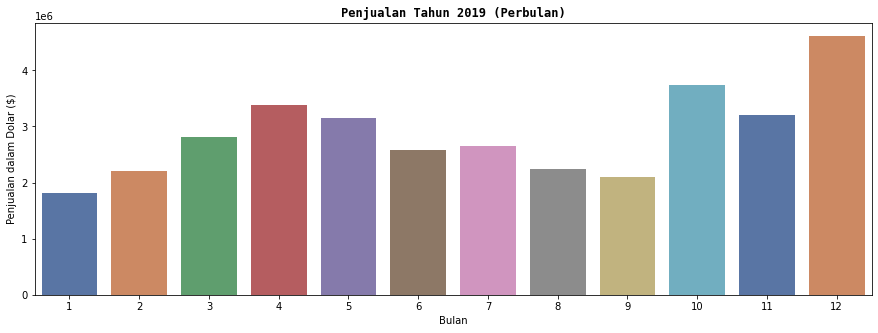

In [54]:
sum_of_month_and_earned = sales_data.groupby('Month').sum().astype('int')
plt.figure(figsize=(15, 5)) 
sns.barplot(
    x=sum_of_month_and_earned.index, 
    y=sum_of_month_and_earned['Sales'], 
    data=sum_of_month_and_earned, palette='deep'
)
plt.title('Penjualan Tahun 2019 (Perbulan)', 
          fontname='monospace', weight='bold'
)
plt.xlabel('Bulan')
plt.ylabel('Penjualan dalam Dolar ($)');

In [55]:
sales_data.groupby(['Month']).sum().astype('int')

,Quantity Ordered,Price Each,Year,Hour,Minute,Sales
Month,,,,,,
1,10903,1811768,19602505,139485,282440,1822256
2,13449,2188884,24177525,172669,354885,2202022
3,17005,2791207,30593907,218969,447559,2807100
4,20558,3367671,36905301,262259,544186,3390670
5,18667,3135125,33446754,238780,487899,3152606
6,15253,2562025,27365526,195528,402436,2577802
7,16072,2632539,28857567,206169,417349,2647775
8,13448,2230345,24149259,172289,353857,2244467
9,13109,2084992,23462799,168513,341698,2097560


**What time should we display adverstisement to maximize likelihood of customer's buying product?**

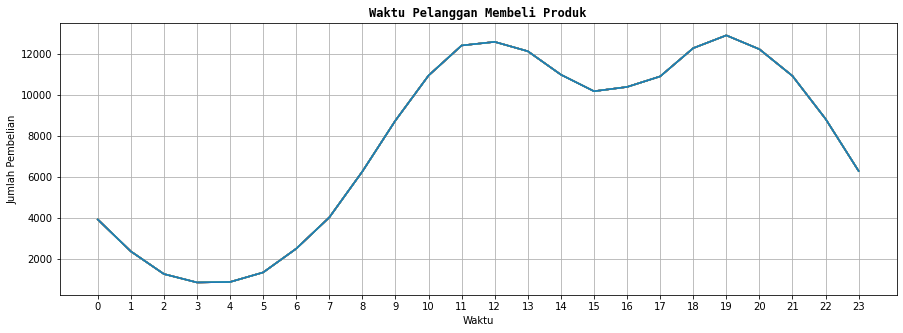

In [56]:
hours = [hour for hour, df in sales_data.groupby('Hour')]
plt.figure(figsize=(15, 5)) 
plt.plot(hours, sales_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid(True)
plt.title('Waktu Pelanggan Membeli Produk', 
    fontname='monospace', weight='bold'
)
plt.xlabel('Waktu')
plt.ylabel('Jumlah Pembelian');

**What product sold the most?**

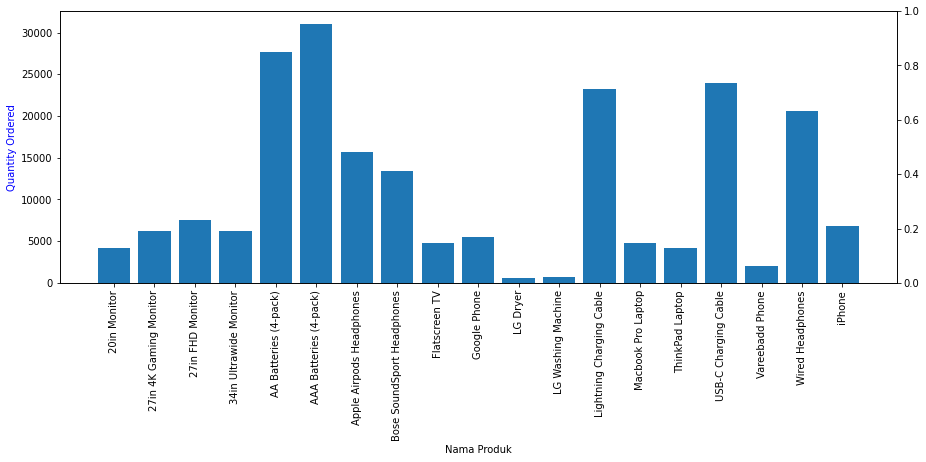

In [57]:
product_group = sales_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
prices = sales_data.groupby('Product').mean()['Price Each']
products = [product for product, df in product_group]
fig, ax1 = plt.subplots(figsize=(15, 5))
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax1.set_xlabel('Nama Produk')
ax1.set_ylabel('Quantity Ordered', color='b')
ax1.set_xticklabels(products, rotation='vertical');

In [58]:
sales_data.Product.value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64